In [92]:
import numpy as np
import matplotlib.pyplot as plt


class polynomial(object):
    def __init__(self, c, t, v='x'):
        self.coeff = c
        self.functionType=t
        self.v = v
    def __repr__(self):
        coeff = self.coeff
        functionType=self.functionType
        v = self.v
        s = ''
        D = len(coeff)
        
        first = True
        
        for i in range(D):
            pw = D-i-1
            pre = '+' if coeff[i]>0 else ''

            if first:
                if pre=='+':
                    pre = ''
                first = False
            

            if pw == 0:
                vname = ''
                term = ''
            elif pw == 1:
                vname = v
                tri = 'cos' if functionType[i] else 'sin'
                term =tri+ '(' + vname + ')'+' '
            else:
                vname = str(pw)+v 
                tri='cos' if functionType[i] else 'sin'
                term =tri+ '(' + vname + ')'+' '
            if coeff[i] != 0:
                s += pre+str(coeff[i])+ ' ' + term
                
        return s
    def __add__(self,b):
        """Computes a+b and returns the result"""
        ### Note:  This code does not add polynomials 
        ###        of different orders so you must fix this
        L_a = len(self.coeff)
        L_b = len(b.coeff)
        
        coeff = self.coeff if L_a > L_b else b.coeff
        short = self.coeff if L_a <= L_b else b.coeff
        
        for i in range(len(short)):
            coeff[-1-i] += short[-1-i]
            
        return polynomial(coeff, self.v)
        
    def plot(self, number_of_points=100, left=-5, right=5):
        """
            Evaluates the polynomial at number_of_points equally spaced 
            points between left and right and plots the result using matplotlib
        """
        x = np.linspace(left,right,number_of_points)
        y = 0
        
        coeff = self.coeff
        functionType=self.functionType
        v = self.v
        s = ''
        D = len(coeff)
        
        for i in range(D):
            if functionType[i]:
                y += (np.cos(x*(D-i-1)))*coeff[i]
            elif (i==(D-1)):
                y += coeff[i]
            else :
                y += (np.sin(x*(D-i-1)))*coeff[i]
                
        plt.plot(x, y, 'k')
        plt.show()
        
        return
    
    

In [93]:
p = polynomial([ 7, 0.1, -3,9,-1,4], [True,False,False,True,False,False],'x')
p

7 cos(5x) +0.1 sin(4x) -3 sin(3x) +9 cos(2x) -1 sin(x) +4 

1 cos(x) +1 


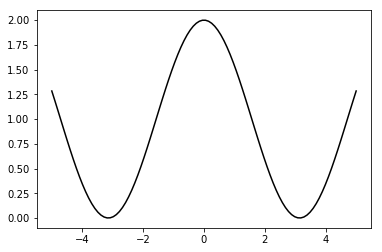

In [97]:
c = polynomial([1,1],[True,False],'x')
print(c)
c.plot()

2 cos(3x) +4 sin(2x) +1 sin(x) +1 


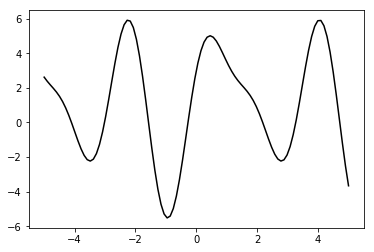

In [95]:
k = polynomial([2,4,1,1],[True,False,False,False],'x')
print(k)
k.plot()

1 cos(2x) +1 sin(x) +1 


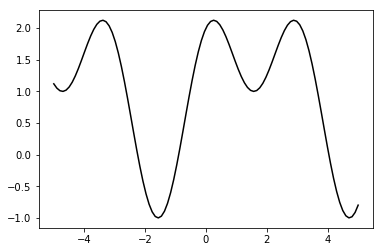

In [96]:
k = polynomial([1,1,1],[True,False,False],'x')
print(k)
k.plot()

In [44]:
class myobj:
    def __init__(self, name):
        self.dependencies = []
        self.name = name

    def add_dependency(self, *myobj):
        self.dependencies.extend(myobj)

    def build(self, names=None):
        if names is None:
            names = []

        for i in self.dependencies:
            if i.name not in names:
                i.build(names)
                names.append(i.name)
        return names
            
    def __str__(self):
        return self.name

In [46]:
    
luke    = myobj("Luke")
hansolo = myobj("Han Solo")
leia    = myobj("Leia")
yoda    = myobj("Yoda")
padme   = myobj("Padme Amidala")
anakin  = myobj("Anakin Skywalker")
obi     = myobj("Obi-Wan")
darth   = myobj("Darth Vader")
_all    = myobj("All")


luke.add_dependency(hansolo, leia, yoda)
leia.add_dependency(padme, anakin)
obi.add_dependency(yoda)
darth.add_dependency(anakin)

_all.add_dependency(luke, hansolo, leia, yoda, padme, anakin, obi, darth)
_all.build()

['Han Solo',
 'Padme Amidala',
 'Anakin Skywalker',
 'Leia',
 'Yoda',
 'Luke',
 'Obi-Wan',
 'Darth Vader']